In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (38).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (4).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (11).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (57).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (10).jpg
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (34).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (84).jpg
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (52).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_bligh

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import warnings
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import lightgbm as lgb

warnings.filterwarnings('ignore')

2025-08-30 05:49:52.116977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756532992.140711      91 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756532992.149276      91 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


FUSION VISION BOOSTED CLASSIFIER (FVBC) FOR RICE DISEASE DETECTION
Implementation based on the paper by B. Naresh kumar & S. Sakthivel
FVBC Model initialized with:
- Learning Rate: 0.001
- N Estimators: 200
- Max Depth: 10
- Image Size: (224, 224)
Loading train data...
  Processing bacterial_leaf_blight...
  Processing brown_spot...
  Processing healthy...
  Processing narrow_brown_spot...
  Processing leaf_scald...
  Processing leaf_blast...
Loading validation data...
  Processing bacterial_leaf_blight...
  Processing brown_spot...
  Processing healthy...
  Processing narrow_brown_spot...
  Processing leaf_scald...
  Processing leaf_blast...
Loaded 2628 images with 6 classes

Dataset Summary:
Total images: 2628
- bacterial_leaf_blight: 438 images
- brown_spot: 438 images
- healthy: 438 images
- leaf_blast: 438 images
- leaf_scald: 438 images
- narrow_brown_spot: 438 images

Dataset split (as per paper specifications):
- Training: 2102 samples (80.0%)
- Validation: 263 samples (10.0%)


I0000 00:00:1756533103.567282      91 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756533103.567869      91 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG19 feature extractor built successfully!
Feature vector size: 512
Extracting VGG19 features...


I0000 00:00:1756533105.938933     146 service.cc:148] XLA service 0x7aa76800ddc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756533105.939626     146 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756533105.939643     146 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756533106.072674     146 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1756533115.717980     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Extracted features shape: (6306, 512)
Training LightGBM on 6306 samples...
Training completed!

MODEL EVALUATION

Training Set Performance:
Extracting VGG19 features...
Extracted features shape: (100, 512)
Model Performance:
- Accuracy: 0.9600 (96.00%)
- Precision: 0.9624 (96.24%)
- Recall: 0.9600 (96.00%)
- F1-Score: 0.9597 (95.97%)

Validation Set Performance:
Extracting VGG19 features...
Extracted features shape: (263, 512)
Model Performance:
- Accuracy: 0.8023 (80.23%)
- Precision: 0.8030 (80.30%)
- Recall: 0.8023 (80.23%)
- F1-Score: 0.7984 (79.84%)

Test Set Performance:
Extracting VGG19 features...
Extracted features shape: (263, 512)
Model Performance:
- Accuracy: 0.7605 (76.05%)
- Precision: 0.7549 (75.49%)
- Recall: 0.7605 (76.05%)
- F1-Score: 0.7525 (75.25%)

COMPARISON WITH PAPER RESULTS
Dataset         Paper (%)    Our Model (%)   Difference  
------------------------------------------------------------
Training        97.78        96.00           -1.78       
Validation  

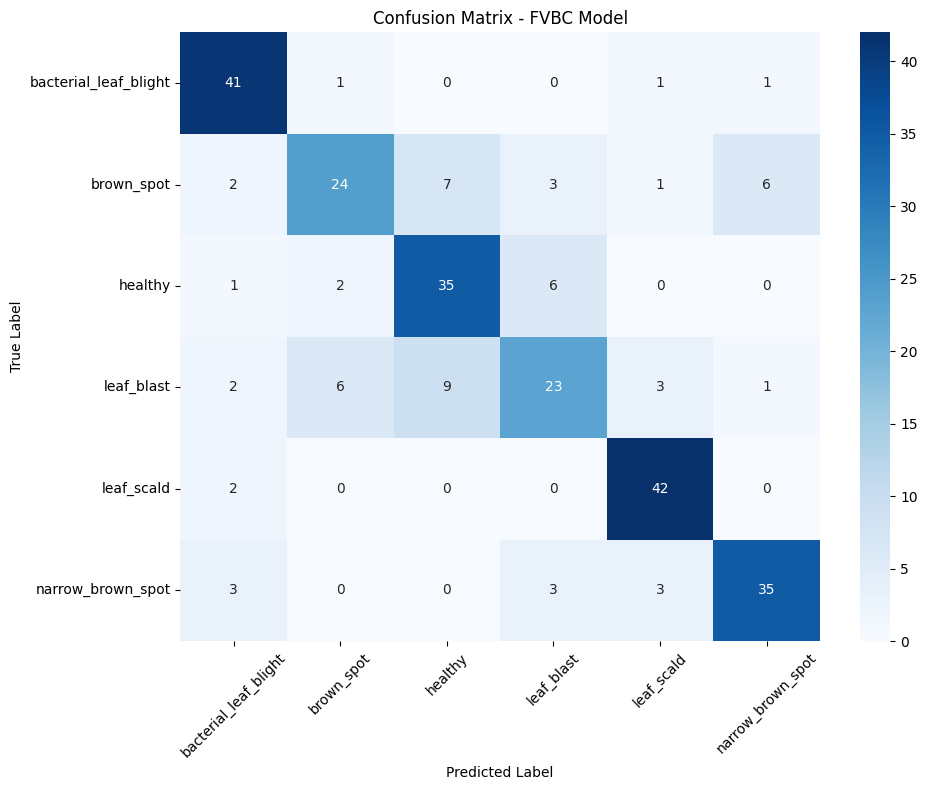


Generating feature importance plot...


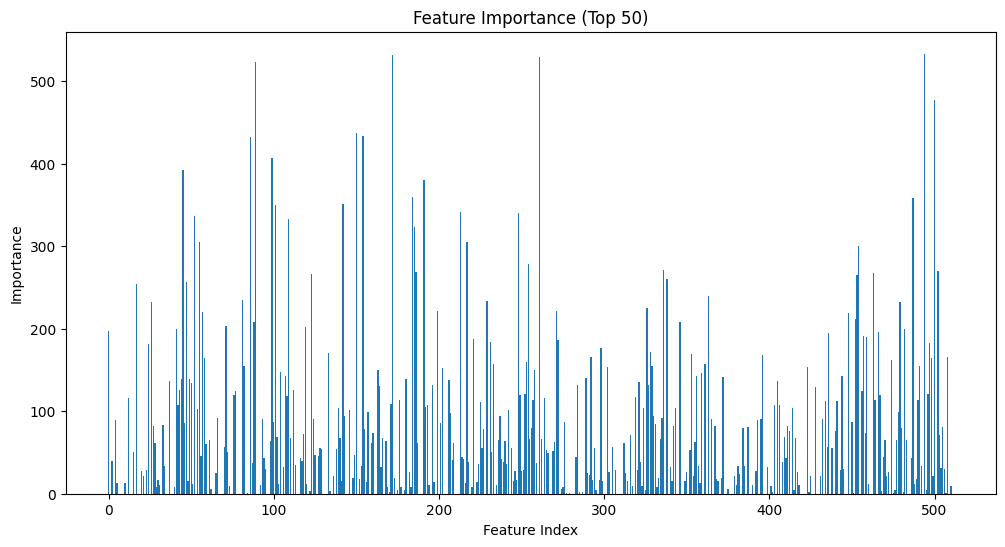


FVBC IMPLEMENTATION COMPLETED SUCCESSFULLY!


In [3]:
class FusionVisionBoostClassifier:

    def __init__(self, 
                 learning_rate=0.001, 
                 n_estimators=200, 
                 max_depth=10, 
                 random_state=42,
                 image_size=(224, 224)):
        
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.image_size = image_size
               
        self.feature_extractor = None
        self.classifier = None
        self.label_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        
        self.disease_classes = [
            'Bacterial_Leaf_Blight',
            'Brown_Spot', 
            'Healthy',
            'Leaf_Blast',
            'Leaf_Scald',
            'Narrow_Brown_Spot'
        ]
        
        print(f"FVBC Model initialized with:")
        print(f"- Learning Rate: {self.learning_rate}")
        print(f"- N Estimators: {self.n_estimators}")
        print(f"- Max Depth: {self.max_depth}")
        print(f"- Image Size: {self.image_size}")
        
    def build_vgg19_feature_extractor(self):

        base_model = VGG19(
            weights='imagenet',
            include_top=False,
            input_shape=(*self.image_size, 3)
        )
        
        base_model.trainable = False
        

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        
        self.feature_extractor = Model(inputs=base_model.input, outputs=x)
        
        print(f"VGG19 feature extractor built successfully!")
        print(f"Feature vector size: {self.feature_extractor.output_shape[1]}")
        
    def preprocess_image(self, image_path):

        try:
            img = cv2.imread(str(image_path))
            if img is None:
                raise ValueError(f"Could not load image: {image_path}")

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img = cv2.resize(img, self.image_size)

            img = cv2.GaussianBlur(img, (3, 3), 0)

            img = img.astype(np.float32) / 255.0
            
            return img
            
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            return None
    
    def load_dataset(self, dataset_path):

        images = []
        labels = []
        
        dataset_path = Path(dataset_path)

        for split in ['train', 'validation', 'test']:
            split_path = dataset_path / split
            if not split_path.exists():
                continue
                
            print(f"Loading {split} data...")

            for class_dir in split_path.iterdir():
                if not class_dir.is_dir():
                    continue
                    
                class_name = class_dir.name
                print(f"  Processing {class_name}...")
                
                # Load images from class directory
                for img_path in class_dir.glob('*'):
                    if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                        img = self.preprocess_image(img_path)
                        if img is not None:
                            images.append(img)
                            labels.append(class_name)
        
        print(f"Loaded {len(images)} images with {len(set(labels))} classes")
        
        return np.array(images), np.array(labels)
    
    def apply_data_augmentation(self, X, y):

        print("Applying data augmentation...")

        datagen = ImageDataGenerator(
            rotation_range=30,           # ±30° rotation
            width_shift_range=0.1,       # Width shifting
            height_shift_range=0.1,      # Height shifting
            horizontal_flip=True,        # Horizontal flipping
            vertical_flip=True,          # Vertical flipping
            brightness_range=[0.8, 1.2], # Brightness adjustment
            zoom_range=0.1,              # Scaling transformations
            fill_mode='nearest'
        )
        
        augmented_images = []
        augmented_labels = []
        
        batch_size = 32
        n_augmented_per_image = 2 
        
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            
            # Add original images
            augmented_images.extend(batch_X)
            augmented_labels.extend(batch_y)
            
            # Generate augmented images
            batch_X_aug = batch_X.reshape((-1, *self.image_size, 3))
            
            aug_iter = datagen.flow(
                batch_X_aug, batch_y,
                batch_size=len(batch_X_aug),
                shuffle=False
            )
            
            for _ in range(n_augmented_per_image):
                aug_batch_X, aug_batch_y = next(aug_iter)
                augmented_images.extend(aug_batch_X)
                augmented_labels.extend(aug_batch_y)
        
        print(f"Dataset augmented from {len(X)} to {len(augmented_images)} images")
        
        return np.array(augmented_images), np.array(augmented_labels)
    
    def extract_features(self, X):

        if self.feature_extractor is None:
            self.build_vgg19_feature_extractor()
        
        print("Extracting VGG19 features...")

        batch_size = 32
        features = []
        
        for i in range(0, len(X), batch_size):
            batch = X[i:i+batch_size]
            batch_features = self.feature_extractor.predict(batch, verbose=0)
            features.append(batch_features)
        
        features = np.vstack(features)
        print(f"Extracted features shape: {features.shape}")
        
        return features
    
    def fit(self, X, y, apply_augmentation=True):

        print("Training FVBC Model...")

        y_encoded = self.label_encoder.fit_transform(y)
        print(f"Classes: {self.label_encoder.classes_}")

        if apply_augmentation:
            X, y_encoded = self.apply_data_augmentation(X, y_encoded)

        X_features = self.extract_features(X)
        
        X_features_scaled = self.scaler.fit_transform(X_features)
        
        self.classifier = lgb.LGBMClassifier(
            learning_rate=self.learning_rate,
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            random_state=self.random_state,
            objective='multiclass',
            num_class=len(self.label_encoder.classes_),
            verbose=-1
        )
        
        print(f"Training LightGBM on {len(X_features_scaled)} samples...")
        self.classifier.fit(X_features_scaled, y_encoded)
        
        print("Training completed!")
        return self
    
    def predict(self, X):

        X_features = self.extract_features(X)

        X_features_scaled = self.scaler.transform(X_features)

        y_pred_encoded = self.classifier.predict(X_features_scaled)

        y_pred = self.label_encoder.inverse_transform(y_pred_encoded)
        
        return y_pred
    
    def predict_proba(self, X):

        X_features = self.extract_features(X)
        X_features_scaled = self.scaler.transform(X_features)
        return self.classifier.predict_proba(X_features_scaled)
    
    def evaluate(self, X, y):
        
        y_pred = self.predict(X)

        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        
        print("Model Performance:")
        print(f"- Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"- Precision: {precision:.4f} ({precision*100:.2f}%)")
        print(f"- Recall: {recall:.4f} ({recall*100:.2f}%)")
        print(f"- F1-Score: {f1:.4f} ({f1*100:.2f}%)")
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    
    def plot_confusion_matrix(self, X, y):

        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred, labels=self.label_encoder.classes_)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.label_encoder.classes_,
                    yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix - FVBC Model')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    
    def get_feature_importance(self):

        if self.classifier is None:
            print("Model not trained yet!")
            return None
        
        importance = self.classifier.feature_importances_
        
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(importance)), importance)
        plt.title('Feature Importance (Top 50)')
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.show()
        
        return importance

def load_rice_dataset(dataset_path):

    fvbc = FusionVisionBoostClassifier()

    X, y = fvbc.load_dataset(dataset_path)
    
    print(f"\nDataset Summary:")
    print(f"Total images: {len(X)}")
    unique, counts = np.unique(y, return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"- {cls}: {count} images")
    
    return X, y, fvbc

def split_dataset(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(val_ratio + test_ratio), 
        random_state=42, stratify=y
    )

    val_size = val_ratio / (val_ratio + test_ratio)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=(1-val_size), 
        random_state=42, stratify=y_temp
    )
    
    print(f"\nDataset split (as per paper specifications):")
    print(f"- Training: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f"- Validation: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
    print(f"- Test: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def main():

    print("=" * 80)
    print("FUSION VISION BOOSTED CLASSIFIER (FVBC) FOR RICE DISEASE DETECTION")
    print("Implementation based on the paper by B. Naresh kumar & S. Sakthivel")
    print("=" * 80)

    dataset_path = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease"

    try:
        X, y, fvbc = load_rice_dataset(dataset_path)
    except Exception as e:
        print(f"Error loading dataset: {e}")
        print("Please update the dataset_path variable to point to your rice dataset")
        return

    X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)
    
    print("\n" + "=" * 60)
    print("TRAINING FVBC MODEL")
    print("=" * 60)
    
    fvbc.fit(X_train, y_train, apply_augmentation=True)

    print("\n" + "=" * 60)
    print("MODEL EVALUATION")
    print("=" * 60)
    
    print("\nTraining Set Performance:")
    train_metrics = fvbc.evaluate(X_train[:100], y_train[:100])  # Sample for speed
    
    print("\nValidation Set Performance:")
    val_metrics = fvbc.evaluate(X_val, y_val)
    
    print("\nTest Set Performance:")
    test_metrics = fvbc.evaluate(X_test, y_test)
    
    # Compare with paper results
    print("\n" + "=" * 60)
    print("COMPARISON WITH PAPER RESULTS")
    print("=" * 60)
    
    paper_results = {
        'Training': 97.78,
        'Validation': 97.5,
        'Test': 97.6
    }
    
    print(f"{'Dataset':<15} {'Paper (%)':<12} {'Our Model (%)':<15} {'Difference':<12}")
    print("-" * 60)
    print(f"{'Training':<15} {paper_results['Training']:<12} {train_metrics['accuracy']*100:<15.2f} {(train_metrics['accuracy']*100 - paper_results['Training']):<12.2f}")
    print(f"{'Validation':<15} {paper_results['Validation']:<12} {val_metrics['accuracy']*100:<15.2f} {(val_metrics['accuracy']*100 - paper_results['Validation']):<12.2f}")
    print(f"{'Test':<15} {paper_results['Test']:<12} {test_metrics['accuracy']*100:<15.2f} {(test_metrics['accuracy']*100 - paper_results['Test']):<12.2f}")

    print("\nGenerating confusion matrix...")
    fvbc.plot_confusion_matrix(X_test, y_test)

    print("\nGenerating feature importance plot...")
    fvbc.get_feature_importance()

if __name__ == "__main__":
    main()